# Perceptrons
You should build an end-to-end machine learning pipeline using a perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

Importing Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading the Dataset

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv')

Splitting the Dataset

In [48]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape,df_test.shape

((3200, 786), (800, 786))

EDA

In [49]:
df_train.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3994,13260,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,10953,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2991,37374,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,31597,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,69405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_train.isnull().sum()

,0
id,0
class,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [51]:
df_train.dtypes.value_counts()

,count
int64,786


In [52]:
df_train.describe()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,3200.000000,3200.000000,3200.0,3200.0,3200.0,3200.0,3200.0,3200.0,3200.0,3200.0,...,3200.000000,3200.000000,3200.000000,3200.000000,3200.0,3200.0,3200.0,3200.0,3200.0,3200.0
mean,34454.785312,4.427812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.095937,0.019062,0.016250,0.001875,0.0,0.0,0.0,0.0,0.0,0.0
std,20488.023669,2.879215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.924578,1.078338,0.919239,0.106066,0.0,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,16743.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,34262.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,52250.750000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,69998.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.000000,61.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_train['class'].unique()

array([1, 3, 0, 7, 6, 9, 5, 8, 2, 4])

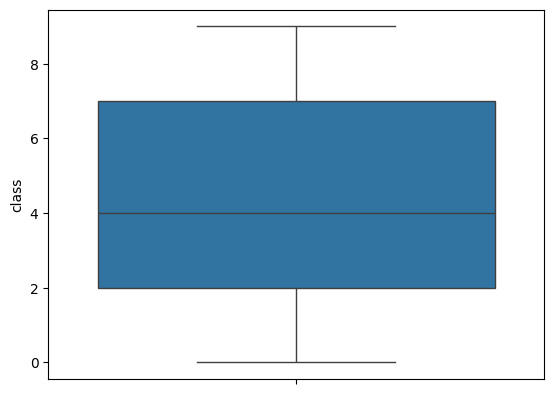

In [54]:
sns.boxplot(df_train['class'])
plt.show()

Data Preprocessing

In [55]:
x_train = df_train.drop('id',axis=1)
y_train = df_train['class']
x_test = df_test.drop('id',axis=1)
y_test = df_test['class']

In [56]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3200, 785) (3200,)
(800, 785) (800,)


Feature Engineering

In [57]:
# sk = StandardScaler()
# x_train = sk.fit_transform(x_train)
# x_test = sk.transform(x_test)
# x_train.shape, x_test.shape

Model Training

SVC

In [66]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [73]:
sv.score(x_train, y_train)*100

98.75

Random Forest Classifier

In [71]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
rf.score(x_train, y_train)*100

100.0

ANN

In [69]:
ann = Perceptron()
ann.fit(x_train,y_train)

Perceptron()

In [75]:
ann.score(x_train, y_train)*100

94.5625

Hyperparameter Tuning

SVC

In [79]:
svc_params = {
    'C': [1, 10],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.001]
}

svc_grid = GridSearchCV(sv, svc_params, cv=5)
svc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['rbf']})

In [80]:
svc_grid.best_params_
svc_grid.best_score_ * 100

np.float64(12.062500000000002)

Random Forest Classifier

In [81]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [20, 50, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 50, None], 'max_features': ['sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [82]:
rf_grid.best_params_
rf_grid.best_score_ * 100

np.float64(96.09375)

Artificial Neural Network

In [83]:
ann_params = {
     'penalty': ['l2', 'elasticnet'],
    'alpha': [0.0001, 0.001],
    'max_iter': [1000, 2000],
    'eta0': [1.0, 0.1],
    'tol': [1e-3]
}

ann_grid = GridSearchCV(ann, ann_params, cv=5)
ann_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001], 'eta0': [1.0, 0.1],
                         'max_iter': [1000, 2000],
                         'penalty': ['l2', 'elasticnet'], 'tol': [0.001]})

In [84]:
ann_grid.best_params_
ann_grid.best_score_ * 100

np.float64(85.65625000000001)